# Raw `numpy` example

In [18]:
import numpy as np 
import math 

x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x) + 0.1 * np.random.randn(len(x))

# randomly initialized weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # forward pass
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # compute loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(f"{t}, {loss:.3}")

    # backpropagate to compute gradients
    grad_y_pred = 2.0 * (y_pred - y) # doing this manually
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f"Result: y = {a:.3} + {b:.3} x + {c:.3} x^2 + {d:.3} x^3")

99, 1e+03
199, 7.15e+02
299, 5.13e+02
399, 3.71e+02
499, 2.7e+02
599, 1.99e+02
699, 1.49e+02
799, 1.14e+02
899, 88.8
999, 71.1
1099, 58.6
1199, 49.8
1299, 43.5
1399, 39.1
1499, 36.0
1599, 33.8
1699, 32.2
1799, 31.1
1899, 30.4
1999, 29.8
Result: y = 0.0383 + 0.863 x + -0.0066 x^2 + -0.0946 x^3


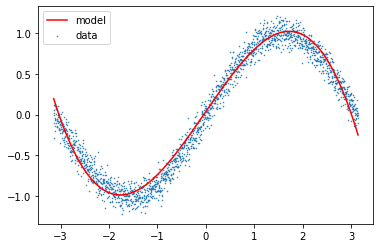

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x,y, s=1, marker='.', label='data')
ax.plot(x, a + b*x + c*x**2 + d*x**3, color='r', label='model')
ax.legend()
plt.show()

# `torch.tensor`

In [27]:
import torch 
import math 

dtype = torch.float #torch.tensor
device = torch.device('cpu')

# create random input/output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x) + 0.1 * torch.randn(len(x))

# randomly init weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(3000):
    # forward pass
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # compute loss
    loss = (y_pred - y).pow(2).sum().item() # item() gets the single number
    if t % 100 == 99:
        print(f"{t}, {loss:.3}")

    # backpropagate to compute gradients
    grad_y_pred = 2.0 * (y_pred - y) # doing this manually
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f"Result: y = {a.item():.3} + {b.item():.3} x + {c.item():.3} x^2 + {d.item():.3} x^3")

99, 2.8e+03
199, 1.91e+03
299, 1.31e+03
399, 8.97e+02
499, 6.2e+02
599, 4.31e+02
699, 3.03e+02
799, 2.16e+02
899, 1.57e+02
999, 1.17e+02
1099, 89.0
1199, 70.2
1299, 57.3
1399, 48.4
1499, 42.4
1599, 38.2
1699, 35.4
1799, 33.4
1899, 32.0
1999, 31.1
2099, 30.5
2199, 30.0
2299, 29.7
2399, 29.5
2499, 29.3
2599, 29.2
2699, 29.2
2799, 29.1
2899, 29.1
2999, 29.1
Result: y = 0.00747 + 0.85 x + -0.000756 x^2 + -0.0922 x^3


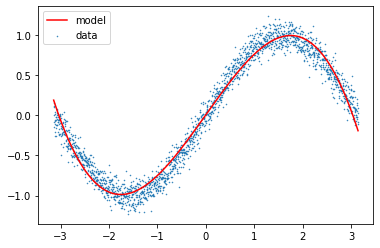

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x,y, s=1, marker='.', label='data')
ax.plot(x, a + b*x + c*x**2 + d*x**3, color='r', label='model')
ax.legend()
plt.show()

# Autograd

"If `x` is a Tensor that has `x.requires_grad=True` then `x.grad` is another Tensor holding the gradient of `x` with respect to some scalar value."

In [29]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 2365.9365234375
199 1577.4677734375
299 1053.167724609375
399 704.4044189453125
499 472.320068359375
599 317.8175048828125
699 214.91909790039062
799 146.3585205078125
899 100.65555572509766
999 70.17439270019531
1099 49.8349494934082
1199 36.25528335571289
1299 27.18351173400879
1399 21.119707107543945
1499 17.063899993896484
1599 14.349320411682129
1699 12.531207084655762
1799 11.31264591217041
1899 10.495280265808105
1999 9.946645736694336
Result: y = 0.018399417400360107 + 0.8287805318832397 x + -0.0031742060091346502 x^2 + -0.0893532782793045 x^3


# `pytorch.nn` module

Autograd may be too low-level for large-scale neural networks. We conceptualize these as layers with learnable parameters. The `nn` module defines `Modules` which are similar to traditional layers; each maps an input to an output, but may also have internal state (e.g., learnable parameters).

In [30]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 475.5480651855469
199 318.73248291015625
299 214.66122436523438
399 145.5774688720703
499 99.70687866210938
599 69.24142456054688
699 49.001502990722656
799 35.551063537597656
899 26.609575271606445
999 20.6634578704834
1099 16.7078857421875
1199 14.075510025024414
1299 12.322994232177734
1399 11.155745506286621
1499 10.377958297729492
1599 9.859424591064453
1699 9.513568878173828
1799 9.282768249511719
1899 9.128654479980469
1999 9.025677680969238
Result: y = -0.006605498027056456 + 0.8440825939178467 x + 0.0011395581532269716 x^2 + -0.09152985364198685 x^3
